In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from pandas.plotting import radviz
from matplotlib import cm
import seaborn as sns
import json

In [3]:
import os
spis = []
#directory = 'C:\Users\User\PycharmProjects\conlluParser\'
for filename in os.listdir():
    if 'final' in filename:
        spis.append(filename)
results = []
for i in spis:
    with open(i) as json_file:
        data = json.load(json_file)
    results.append(data)
results

[{'binary_sentence_ordering': ['{"Bert": {"Bulgarian": 0.51724, "Catalan": 0.57692, "English": 0.75862, "French": 0.51429, "Armenian": 0.8, "Latin": 0.75, "Russian": 0.51515, "Czech": 0.75, "Turkish": 0.52941, "Serbian": 0.8}}\n',
   '{"Roberta": {"Bulgarian": 0.72414, "Catalan": 0.61538, "English": 0.55172, "French": 0.6, "Armenian": 0.8, "Latin": 0.75, "Russian": 0.69697, "Czech": 1.0, "Turkish": 0.58824, "Serbian": 0.4}}\n',
   '{"gpt2": {"Bulgarian": 0.75862, "Catalan": 0.80769, "English": 0.7931, "French": 0.94286, "Armenian": 0.6, "Latin": 0.75, "Russian": 1.0, "Czech": 1.0, "Turkish": 0.97059, "Serbian": 0.8}}\n',
   '{"T5": {"Bulgarian": 0.62069, "Catalan": 0.61538, "English": 0.58621, "French": 0.42857, "Armenian": 1.0, "Latin": 0.75, "Russian": 0.45455, "Czech": 0.75, "Turkish": 0.5, "Serbian": 0.4}}\n']},
 {'cloze_story_test': ['{"Bert": {"Bulgarian": 1.0, "Catalan": 0.94737, "English": 0.83784, "French": 0.875, "Armenian": 0.8, "Latin": 0.90625, "Russian": 0.875, "Czech": 1

In [4]:
import ast
def task_avg(task, name):
    for i in task:
        c_d = {}
        counter = 0
        summer = 0
        for model,slovar in ast.literal_eval(i).items():
            for lang,acc in slovar.items():
                counter+=1
                summer+=acc
    c_d[name]=round(summer/counter,5)
    return c_d    
                

In [7]:
import ast
tsk_avg = {}
for i in results:
    for task, res in (i.items()):
        for i,c in task_avg(res,task).items():
            tsk_avg[i]=c
tsk_avg

{'binary_sentence_ordering': 0.61054,
 'cloze_story_test': 0.8424,
 'dicource_coherence': 0.56997,
 'discourse_connective_prediction': 0.17533,
 'next_sentence_prediction': 0.84851,
 'sentence_ordering': 0.76952,
 'sentence_position': 0.80065}

<AxesSubplot: >

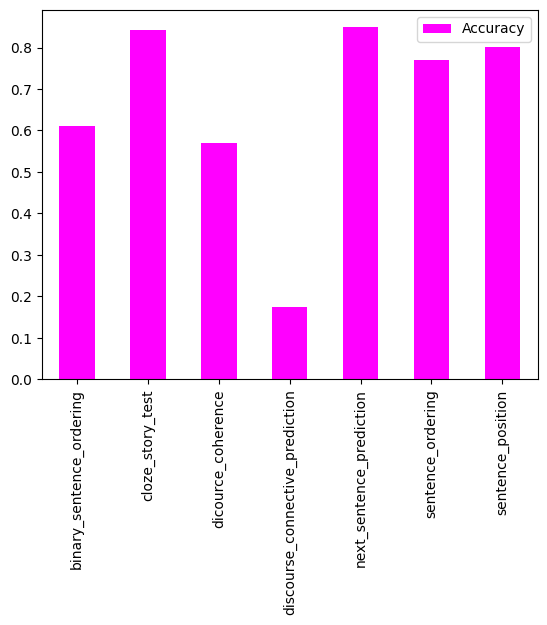

In [6]:
sp = []
vl = []
for task,acc in tsk_avg.items():
    sp.append(task)
    vl.append(acc)
df = pd.DataFrame(vl,index=sp, columns = ['Accuracy'])
df.plot(kind='bar',rot=90, color='magenta')

In [8]:
df

,Accuracy
binary_sentence_ordering,0.61054
cloze_story_test,0.84240
dicource_coherence,0.56997
discourse_connective_prediction,0.17533
next_sentence_prediction,0.84851
sentence_ordering,0.76952
sentence_position,0.80065


In [9]:
import ast
def task_mod(task, name):
    for i in task:
        c_d = {}
        s = []
        counter = 0
        summer = 0
        for model,slovar in ast.literal_eval(i).items():
            slovik={}
            for lang,acc in slovar.items():
                counter+=1
                summer+=acc
                slovik[model]=round(summer/counter,5)
            s.append(slovik)
    c_d[name]=s
    return c_d    

In [10]:
import ast
tsk_avg = {}
for i in results:
    for task, res in (i.items()):
        for i,c in task_mod(res,task).items():
            tsk_avg[i]=c
tsk_avg

{'binary_sentence_ordering': [{'T5': 0.61054}],
 'cloze_story_test': [{'T5': 0.8424}],
 'dicource_coherence': [{'T5': 0.56997}],
 'discourse_connective_prediction': [{'T5': 0.17533}],
 'next_sentence_prediction': [{'T5': 0.84851}],
 'sentence_ordering': [{'T5': 0.76952}],
 'sentence_position': [{'Roberta': 0.80065}]}

In [11]:
import ast
tsk_avg =[]
for i in results:
    for task, res in (i.items()):
        s = []
        c_d={}
        for i in res:
            for model,slovar in ast.literal_eval(i).items():
                counter = 0
                summer =0
                slovik= {}
                for lang,acc in slovar.items():
                    counter+=1
                    summer+=acc
                slovik[model]=round(summer/counter,5)
            s.append(slovik)
            c_d[task] = s
        tsk_avg.append(c_d)


In [12]:
tsk_avg

[{'binary_sentence_ordering': [{'Bert': 0.65116},
   {'Roberta': 0.67265},
   {'gpt2': 0.84229},
   {'T5': 0.61054}]},
 {'cloze_story_test': [{'Bert': 0.90454},
   {'Roberta': 0.94175},
   {'gpt2': 0.83557},
   {'T5': 0.8424}]},
 {'dicource_coherence': [{'Bert': 0.63602},
   {'Roberta': 0.69998},
   {'gpt2': 0.56442},
   {'T5': 0.56997}]},
 {'discourse_connective_prediction': [{'Bert': 0.24018},
   {'Roberta': 0.30675},
   {'gpt2': 0.21835},
   {'T5': 0.17533}]},
 {'next_sentence_prediction': [{'Bert': 0.94172},
   {'Roberta': 0.85059},
   {'gpt2': 0.68758},
   {'T5': 0.84851}]},
 {'sentence_ordering': [{'Bert': 0.80376},
   {'Roberta': 0.77381},
   {'gpt2': 0.72008},
   {'T5': 0.76952}]},
 {'sentence_position': [{'Bert': 0.6847},
   {'T5': 0.63662},
   {'gpt2': 0.57641},
   {'Roberta': 0.80065}]}]

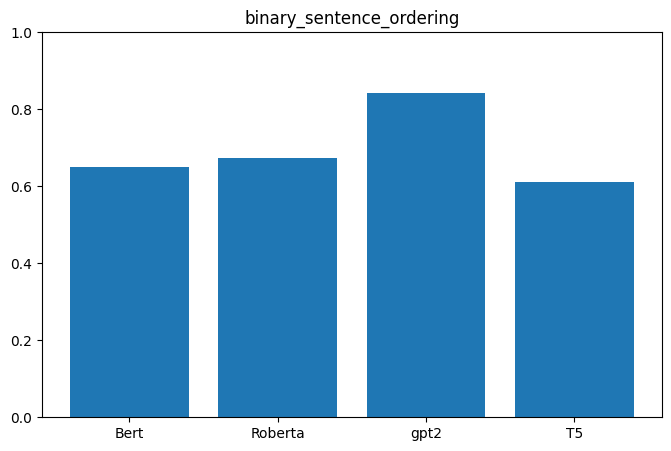

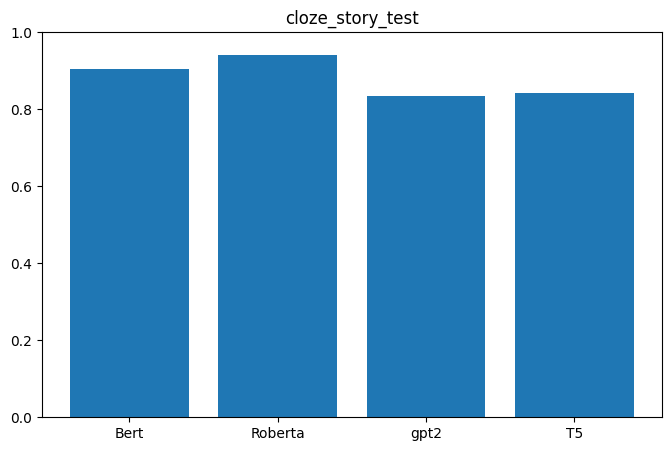

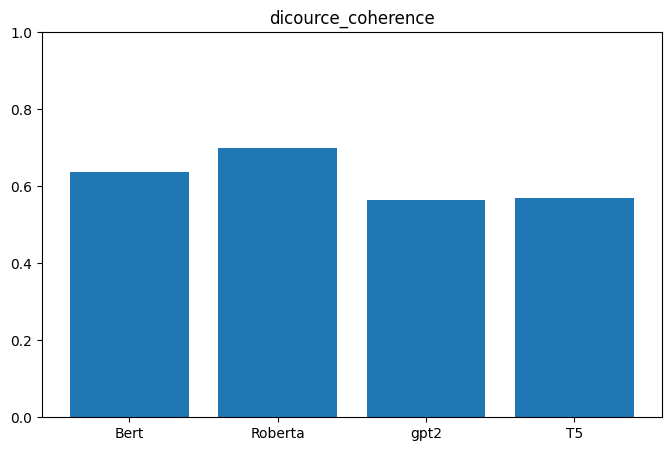

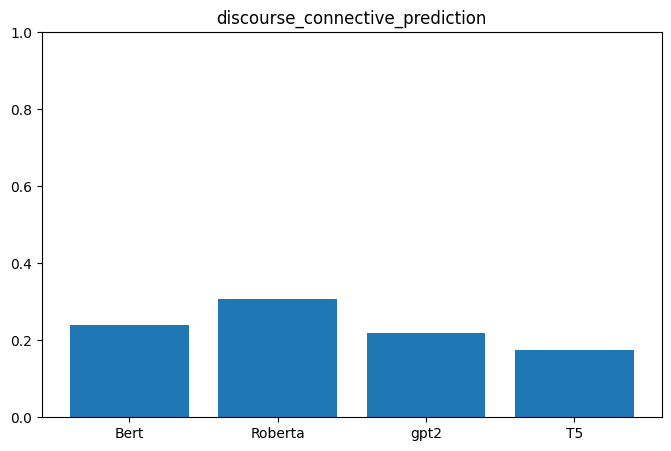

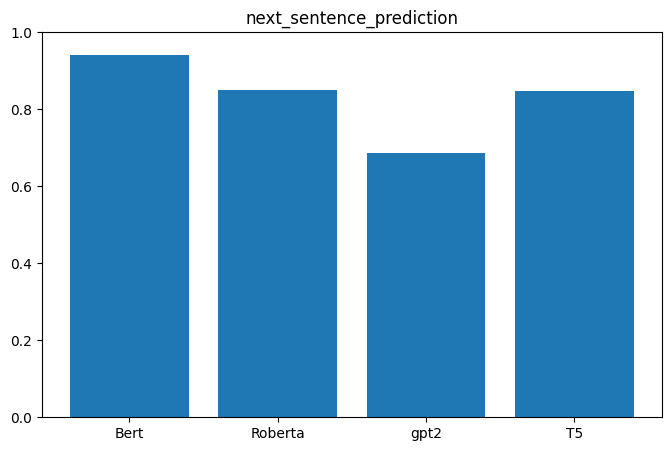

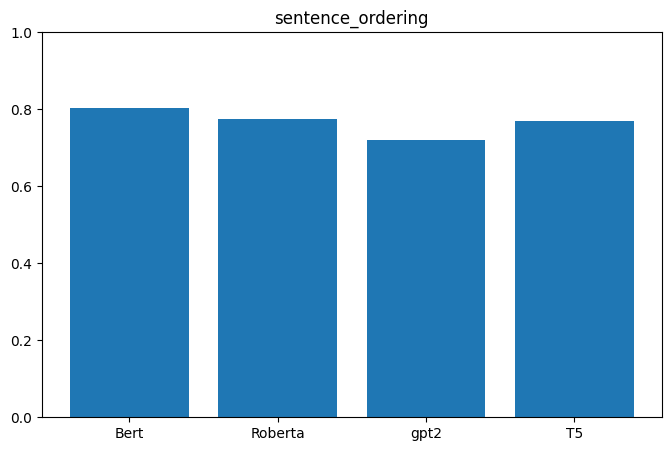

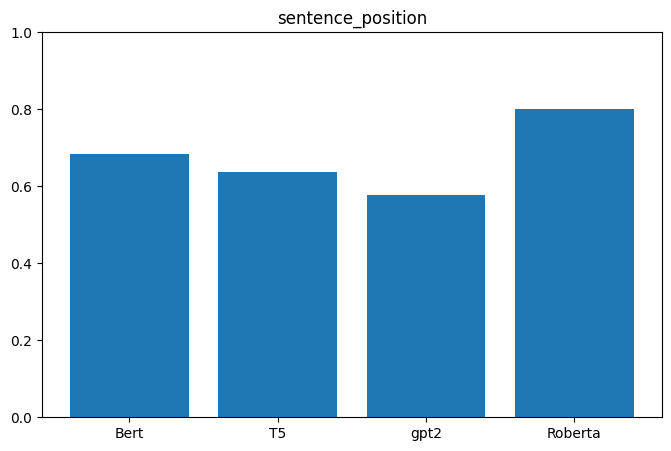

In [54]:
for i in tsk_avg:    
    sp=[]
    vl=[]
    for task,acc in i.items():
        for i in acc:
            for model,acc in i.items():
                sp.append(model)
                vl.append(acc)
        df = pd.DataFrame(sp, columns = ['Models']) 
        df['Accuracy']=vl 
        fig, ax = plt.subplots(figsize =(8, 5))
        plt.bar(df['Models'],df['Accuracy'])
        plt.ylim(0, 1)
        ax.set_title(f'{task}')
        plt.show()
        

In [14]:
tasks = []
models = []
langs = []
accs = []
all = pd.DataFrame(columns = ['Tasks','Models','Languages','Accuracy']) 
for i in results:
    for task, res in (i.items()):
        for i in res:
            for model, ac in ast.literal_eval(i).items():
                counter = 0
                summer = 0
                for lang,acc in ac.items():
                    #print(task, model, lang, acc)
                    tasks.append(task)
                    models.append(model)
                    langs.append(lang)
                    accs.append(acc)
all['Tasks']=tasks
all['Models']=models
all['Languages']=langs
all['Accuracy']=accs
all

,Tasks,Models,Languages,Accuracy
0,binary_sentence_ordering,Bert,Bulgarian,0.51724
1,binary_sentence_ordering,Bert,Catalan,0.57692
2,binary_sentence_ordering,Bert,English,0.75862
3,binary_sentence_ordering,Bert,French,0.51429
4,binary_sentence_ordering,Bert,Armenian,0.80000
...,...,...,...,...
275,sentence_position,Roberta,Latin,0.96296
276,sentence_position,Roberta,Russian,1.00000
277,sentence_position,Roberta,Czech,0.72727
278,sentence_position,Roberta,Turkish,0.55556


In [15]:
all.groupby('Tasks')['Accuracy'].median()

Tasks
binary_sentence_ordering           0.737070
cloze_story_test                   0.906250
dicource_coherence                 0.655915
discourse_connective_prediction    0.237905
next_sentence_prediction           0.869355
sentence_ordering                  0.779170
sentence_position                  0.714290
Name: Accuracy, dtype: float64

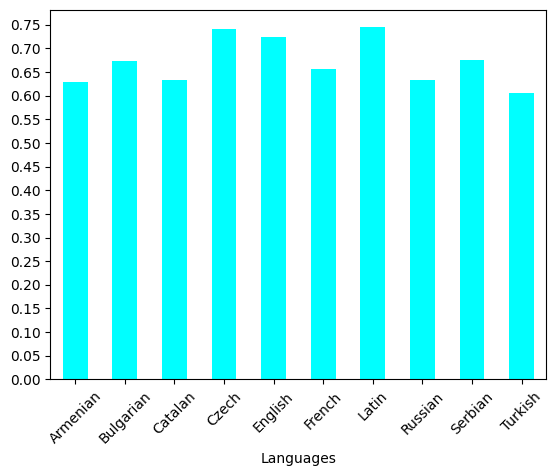

In [16]:
all.groupby('Languages')['Accuracy'].mean().plot(kind='bar',color='aqua', rot=45)
plt.locator_params(axis='y', nbins= 20) 

In [17]:
model_langs = pd.DataFrame(all.groupby(['Models','Languages'])['Accuracy'].mean())
model_langs = model_langs.reset_index()

In [18]:
langs_model= pd.DataFrame(all.groupby(['Languages','Models'])['Accuracy'].mean())
langs_model = langs_model.reset_index()
#langs_model = langs_model.set_index('Languages')

In [19]:
langs_model['Languages'].unique()

array(['Armenian', 'Bulgarian', 'Catalan', 'Czech', 'English', 'French',
       'Latin', 'Russian', 'Serbian', 'Turkish'], dtype=object)

In [21]:
langs_model.loc[0:3,'Accuracy']

0    0.664630
1    0.692714
2    0.664779
3    0.496274
Name: Accuracy, dtype: float64

Text(0.5, 1.0, 'French')

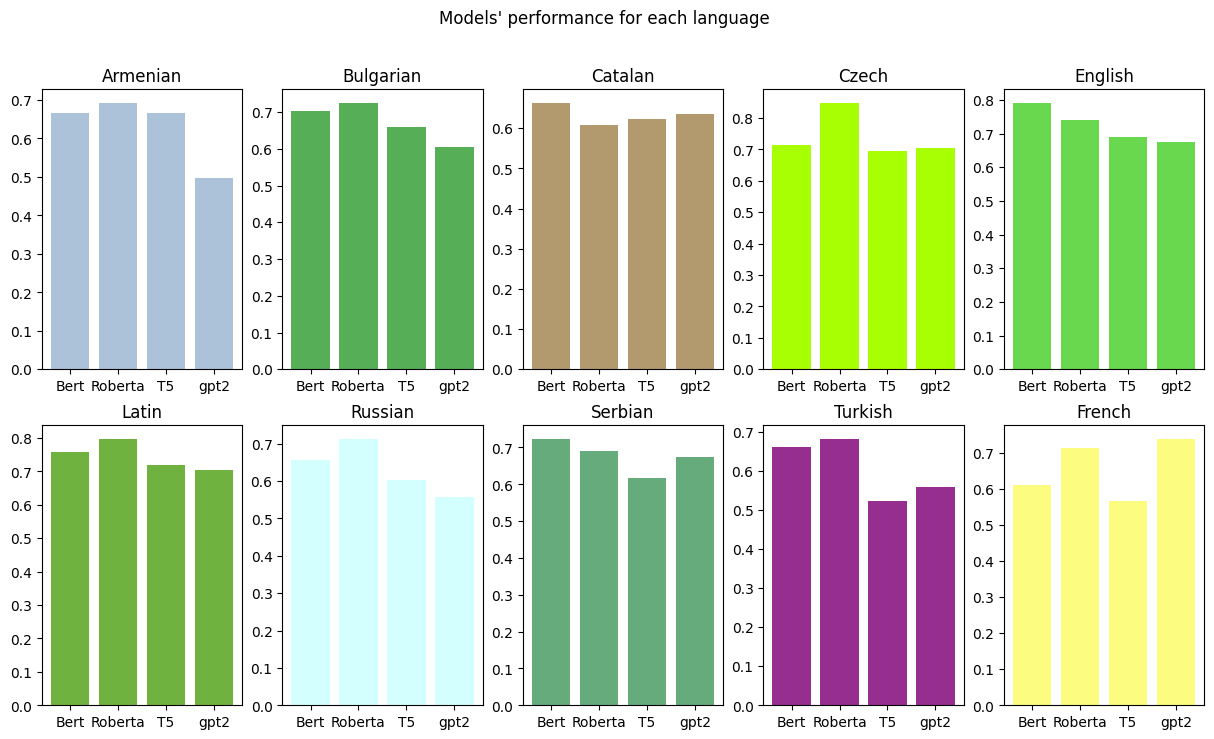

In [51]:
import matplotlib.colors as colors
fig, axs = plt.subplots(nrows= 2 , ncols= 5 )
colors_list = list(colors._colors_full_map.values())
#add title
fig. suptitle('Models\' performance for each language')
fig.set_figheight(8)
fig.set_figwidth(15)
#add data to plots
axs[0, 0].bar(langs_model.loc[0:3,'Models'],langs_model.loc[0:3,'Accuracy'], color=colors_list[0])
axs[0,0].set_title("Armenian")
axs[0, 1].bar(langs_model.loc[4:7,'Models'],langs_model.loc[4:7,'Accuracy'], color=colors_list[1])
axs[0,1].set_title("Bulgarian")
axs[0, 2].bar(langs_model.loc[8:11,'Models'],langs_model.loc[8:11,'Accuracy'], color=colors_list[2])
axs[0,2].set_title("Catalan")
axs[0, 3].bar(langs_model.loc[12:15,'Models'],langs_model.loc[12:15,'Accuracy'], color=colors_list[3])
axs[0,3].set_title("Czech")
axs[0, 4].bar(langs_model.loc[16:19,'Models'],langs_model.loc[16:19,'Accuracy'], color=colors_list[4])
axs[0,4].set_title("English")
axs[1, 0].bar(langs_model.loc[24:27,'Models'],langs_model.loc[24:27,'Accuracy'], color=colors_list[6])
axs[1,0].set_title("Latin")
axs[1, 1].bar(langs_model.loc[28:31,'Models'],langs_model.loc[28:31,'Accuracy'], color=colors_list[7])
axs[1,1].set_title("Russian")
axs[1, 2].bar(langs_model.loc[32:35,'Models'],langs_model.loc[32:35,'Accuracy'], color=colors_list[8])
axs[1,2].set_title("Serbian")
axs[1, 3].bar(langs_model.loc[36:39,'Models'],langs_model.loc[36:39,'Accuracy'], color=colors_list[9])
axs[1,3].set_title("Turkish")
axs[1, 4].bar(langs_model.loc[20:23,'Models'],langs_model.loc[20:23,'Accuracy'], color=colors_list[10])
axs[1,4].set_title("French")

<AxesSubplot: xlabel='Models'>

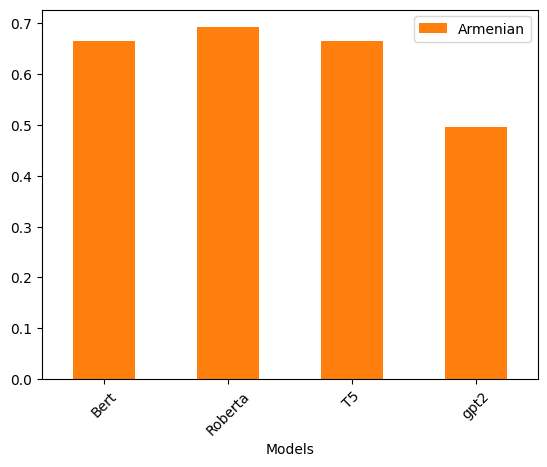

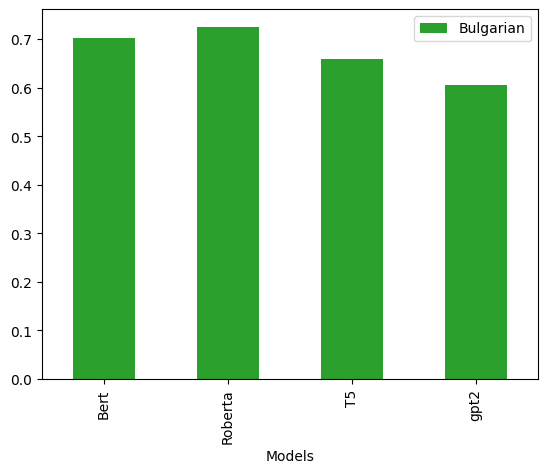

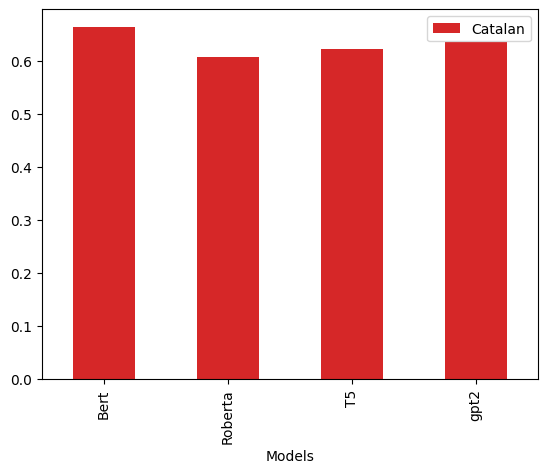

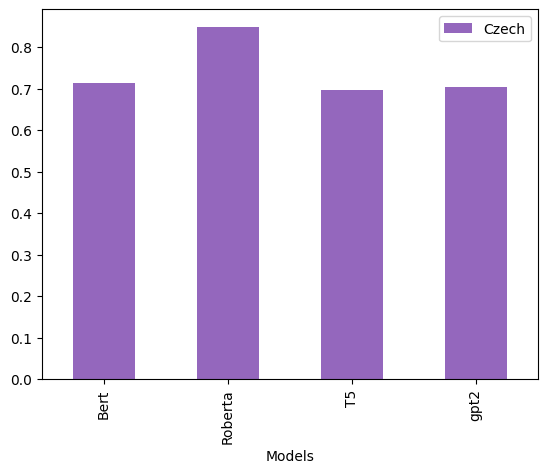

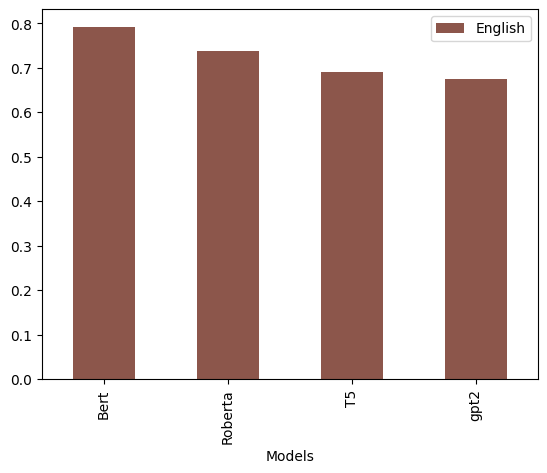

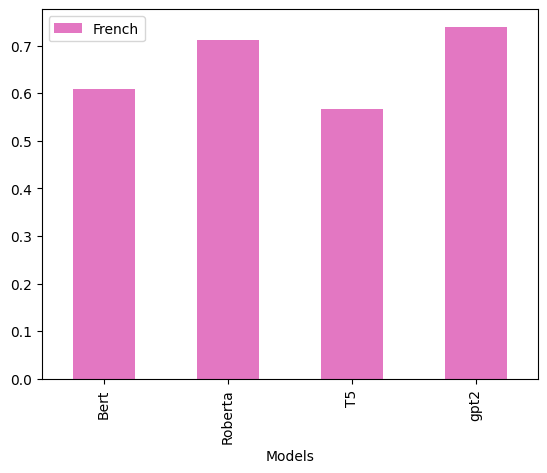

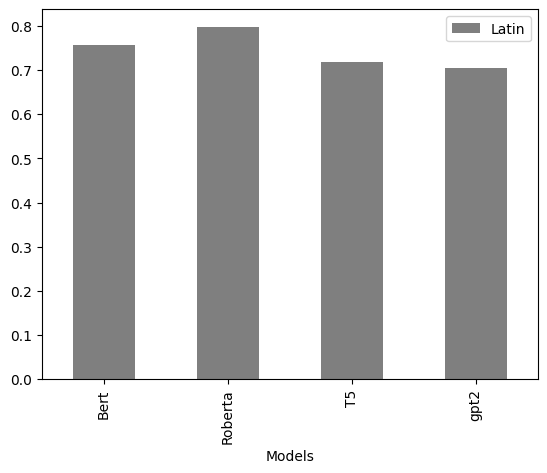

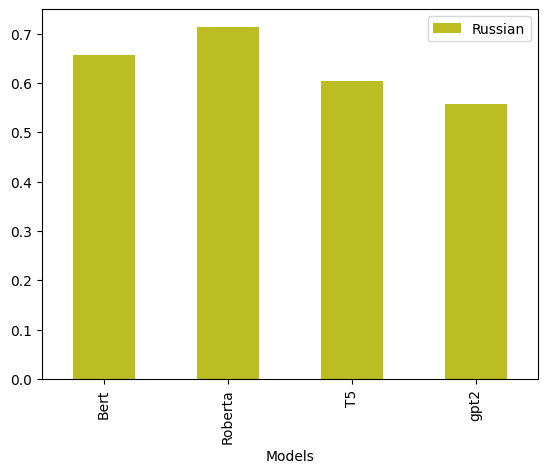

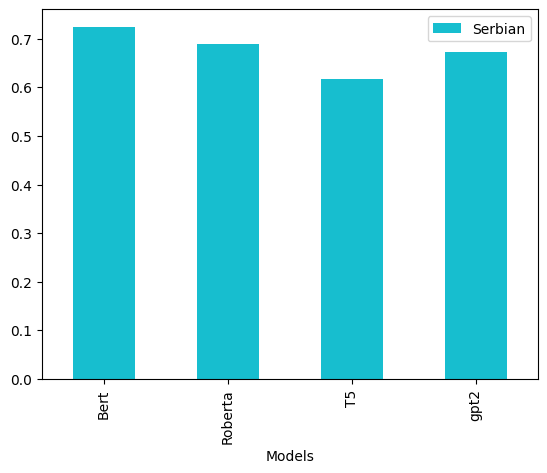

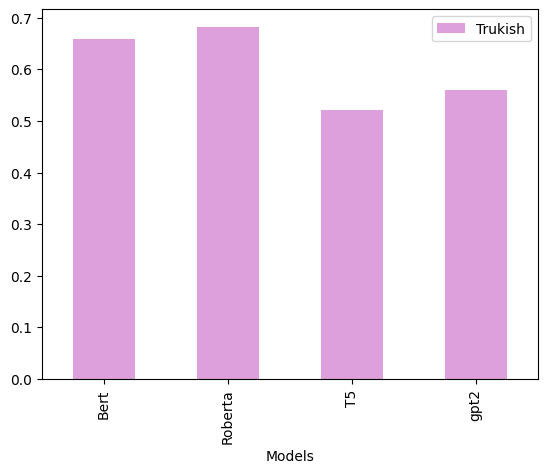

In [18]:
langs_model.loc[0:3].plot(kind="bar", y='Accuracy',x='Models',label='Armenian',color='C1', rot=45)
langs_model.loc[4:7].plot(kind="bar", y='Accuracy',x='Models',label='Bulgarian',color='C2')
langs_model.loc[8:11].plot(kind="bar", y='Accuracy',x='Models',label='Catalan',color='C3')
langs_model.loc[12:15].plot(kind="bar", y='Accuracy',x='Models',label='Czech',color='C4')
langs_model.loc[16:19].plot(kind="bar", y='Accuracy',x='Models',label='English',color='C5')
langs_model.loc[20:23].plot(kind="bar", y='Accuracy',x='Models',label='French',color='C6')
langs_model.loc[24:27].plot(kind="bar", y='Accuracy',x='Models',label='Latin',color='C7')
langs_model.loc[28:31].plot(kind="bar", y='Accuracy',x='Models',label='Russian',color='C8')
langs_model.loc[32:35].plot(kind="bar", y='Accuracy',x='Models',label='Serbian',color='C9')
langs_model.loc[36:39].plot(kind="bar", y='Accuracy',x='Models',label='Trukish',color='plum')

In [60]:
model_tasks = pd.DataFrame(all.groupby(['Tasks','Models'])['Accuracy'].mean())
model_tasks = model_tasks.reset_index()

In [61]:
model_tasks

,Tasks,Models,Accuracy
0,binary_sentence_ordering,Bert,0.651163
1,binary_sentence_ordering,Roberta,0.672645
2,binary_sentence_ordering,T5,0.610540
3,binary_sentence_ordering,gpt2,0.842286
4,cloze_story_test,Bert,0.904538
5,cloze_story_test,Roberta,0.941754
6,cloze_story_test,T5,0.842404
7,cloze_story_test,gpt2,0.835565
8,dicource_coherence,Bert,0.636020
9,dicource_coherence,Roberta,0.699981


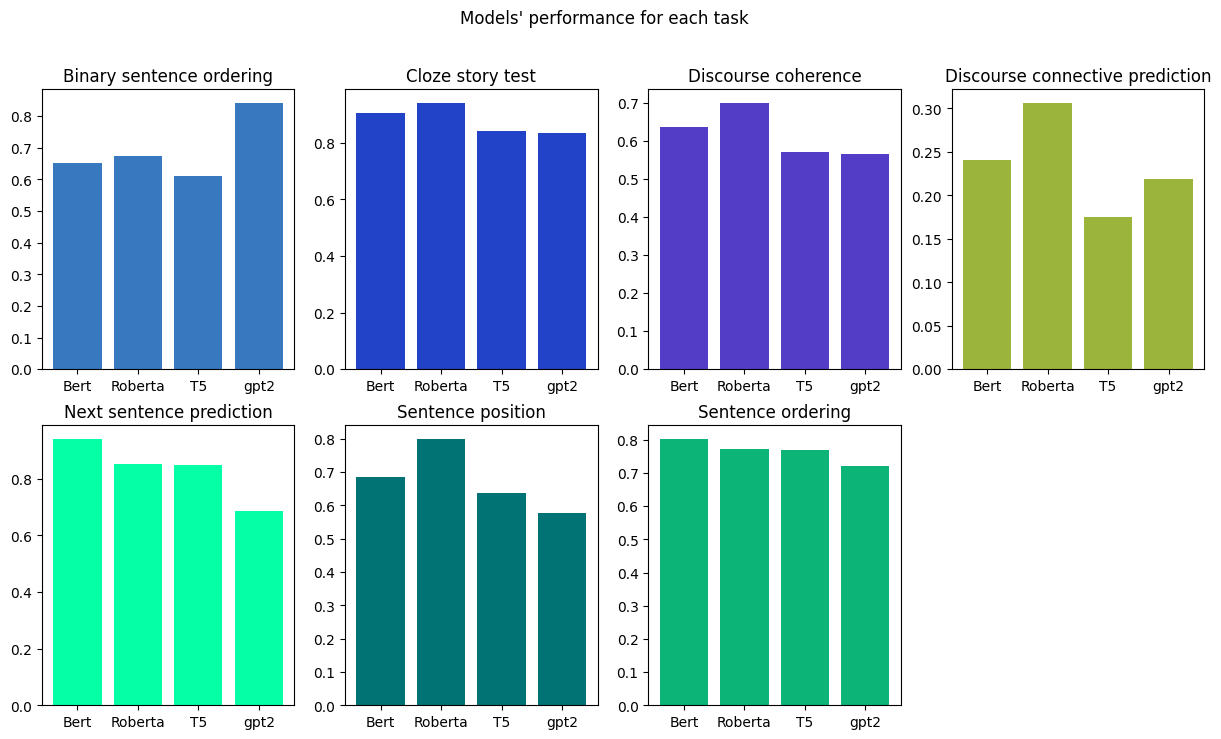

In [70]:
fig, axs = plt.subplots(nrows= 2 , ncols= 4 )
colors_list = list(colors._colors_full_map.values())
#add title
fig. suptitle('Models\' performance for each task')
fig.set_figheight(8)
fig.set_figwidth(15)
#add data to plots
axs[0, 0].bar(model_tasks.loc[0:3,'Models'],model_tasks.loc[0:3,'Accuracy'], color=colors_list[20])
axs[0,0].set_title("Binary sentence ordering")
axs[0, 1].bar(model_tasks.loc[4:7,'Models'],model_tasks.loc[4:7,'Accuracy'], color=colors_list[21])
axs[0,1].set_title("Cloze story test")
axs[0, 2].bar(model_tasks.loc[8:11,'Models'],model_tasks.loc[8:11,'Accuracy'], color=colors_list[22])
axs[0,2].set_title("Discourse coherence")
axs[0, 3].bar(model_tasks.loc[12:15,'Models'],model_tasks.loc[12:15,'Accuracy'], color=colors_list[23])
axs[0,3].set_title("Discourse connective prediction")
axs[1, 0].bar(model_tasks.loc[16:19,'Models'],model_tasks.loc[16:19,'Accuracy'], color=colors_list[24])
axs[1,0].set_title("Next sentence prediction")
axs[1, 2].bar(model_tasks.loc[20:23,'Models'],model_tasks.loc[20:23,'Accuracy'], color=colors_list[27])
axs[1,2].set_title("Sentence ordering")
axs[1, 1].bar(model_tasks.loc[24:27,'Models'],model_tasks.loc[24:27,'Accuracy'], color=colors_list[26])
axs[1,1].set_title("Sentence position")
fig.delaxes(axs[1,3])